# 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# y''(t) + ay'(t) + ω**2 *y(t) = cos(ω1t)
# y(0) = A, y'(0) = 0
# t tinitial = 0 and t final = 10 with N = 1000

# 1st order forward finite diff (euiler tylor)
# y'(x) = ( y(x+h)-y(h) )/h

ti=0
tf=10
N=1000
h= (tf-ti)/N
w1=1
w=1
a=1
A=4

ypp= np.zeros(N)
yp= np.zeros(N)
yp[0]= 0
y= np.zeros(N)
y[0]= A

for i in range(N-1):
  ypp[i]= np.cos(w1*(ti+i*h)) - ( a*yp[i] + w**2 *y[i]  )
  # ypp[i]= (yp[i+1]-yp[i])/h yp[i]=ok ypp[i]=ok => yp[i+1]=ok forward
  yp[i+1]= ypp[i]*h + yp[i]
  # yp[i]= (y[i+1]-y[i])/h  yp[i]=ok y[i]=ok => y[i+1]=ok forward
  # BUT y[0]=0 !
  # yp[i] = (y[i]-y[i-1])/h backward i->i+1 -> yp[i+1] = (y[i+1]-y[i])/h
  y[(i+1)]=h*yp[(i+1)]+ y[i]



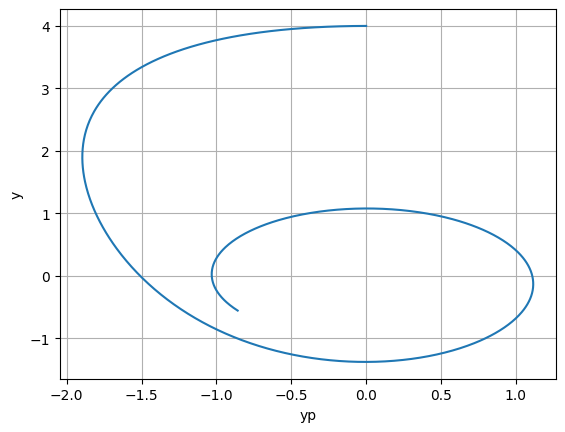

In [18]:
plt.plot(yp,y)
plt.xlabel('yp')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 2

Φ(0, y) = y
2
, Φ(x, 0) = x, Φ(L, y) = 0 and Φ(x, L) = 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
N=100

def relaxtation(N,m):

  phi=np.random.rand(N,N)

  phi[0,:]= [i**2 for i in range(N)]
  phi[:,0]= [i for i in range(N)]
  phi[N-1,:]= [0]*N
  phi[:,N-1]= [1]*N

  for n in range(m*N):
    i,j=np.random.randint(0,N-1,2)
    phi[i,j]= (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

  return phi

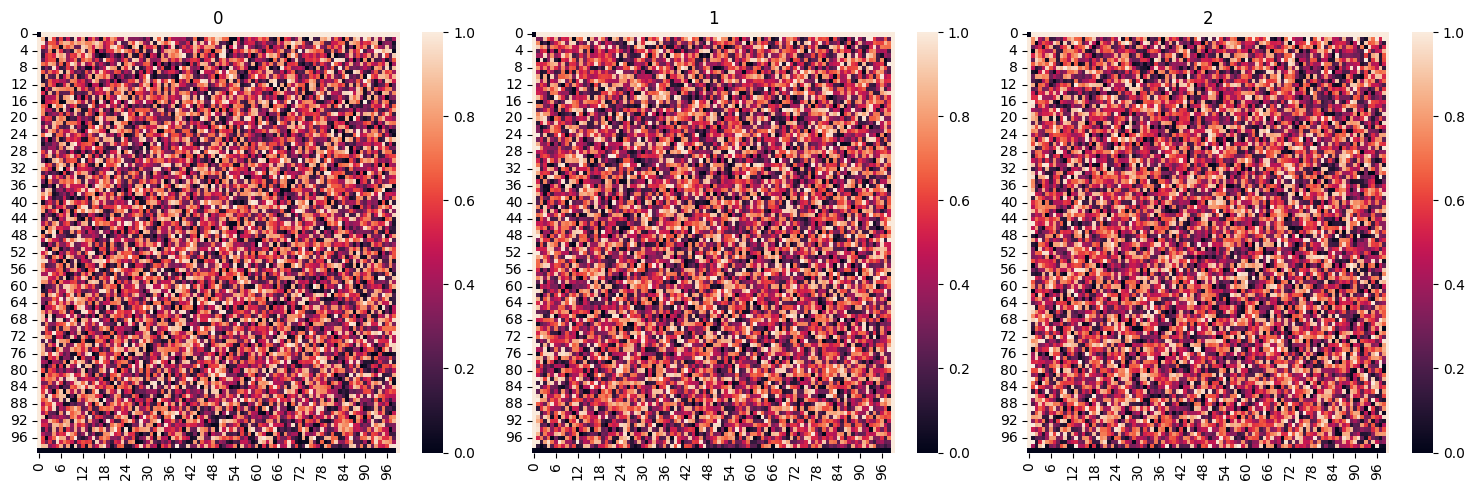

In [ ]:
phis= [relaxtation(N,m) for m in np.arange(1,16,5)]

fig,axs= plt.subplots(1,3,figsize=(15,5))
axs= axs.flatten()

for i in range(3):
  sns.heatmap(phis[i],vmax=1,ax=axs[i])
  axs[i].set_title(f'{i}')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# 3

## X Vs T

In [ ]:
M=1 #initial con
N=100 # last x= x_N

def logestic1(N,M,miu):

  xs= np.zeros((M,N))

  for j in range(M):
    x= np.random.rand()*.5 # beautifulation
    for i in range(N):
      x=x*(1-x)*(miu)

      xs[j,i]=x

  return xs


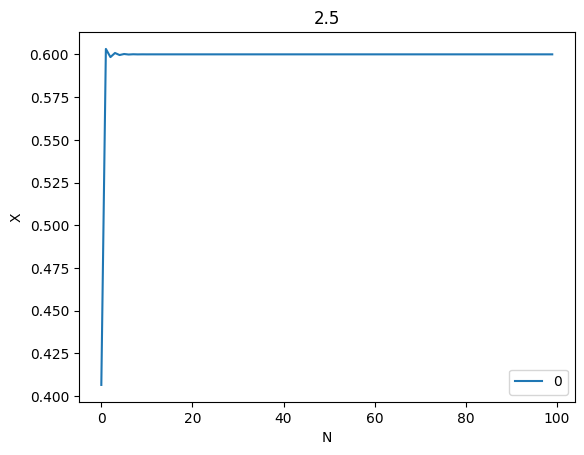

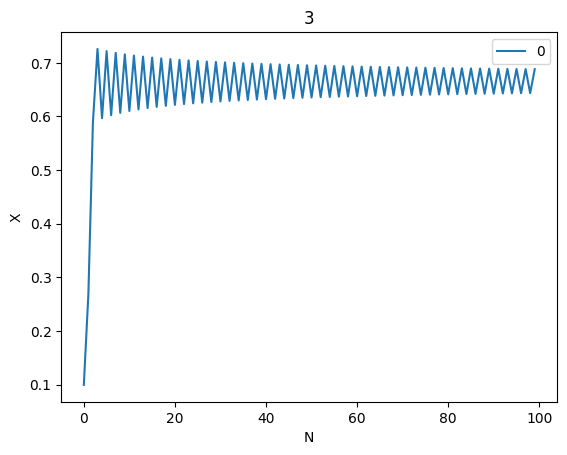

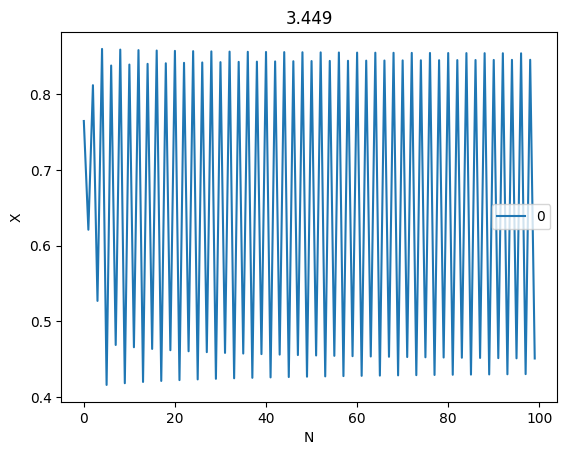

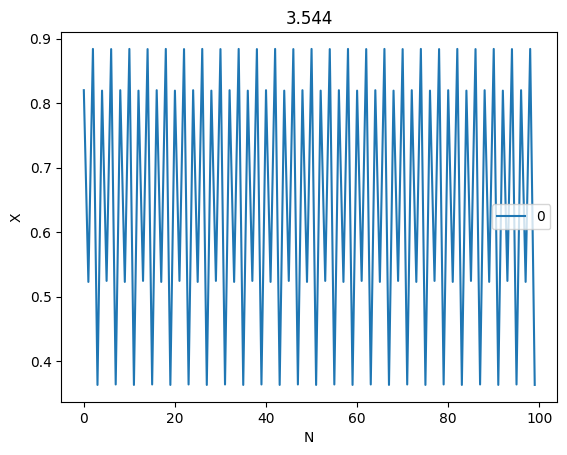

In [ ]:
#3<2cycle<3.449<4cycle<3.544
for miu in [2.5,3,3.449,3.544]:
  xs= logestic1(N,M,miu)
  for i in range(M):
    plt.plot(xs[i,:],label=f'{i}')
  plt.legend()
  plt.title(f'{miu}')
  plt.xlabel('N')
  plt.ylabel('X')
  plt.show()

## Biforcation

In [ ]:
M=10 #initial con
N=1000 # last x= x_N

def logestic(N,M):

  miu_max= 5
  d= 10
  mius= np.arange(0,miu_max*d,1)
  xs= np.zeros((M,miu_max*d))

  for miu in mius:
    for j in range(M):
      x= np.random.rand()
      for i in range(N):
        x=x*(1-x)*(miu/d)

      xs[j,miu]=x
      # mius.append(miu*.5)

  return xs,mius/d


<ipython-input-159-c5170e57bf35>:15: RuntimeWarning: overflow encountered in scalar multiply
  x=x*(1-x)*(miu/d)


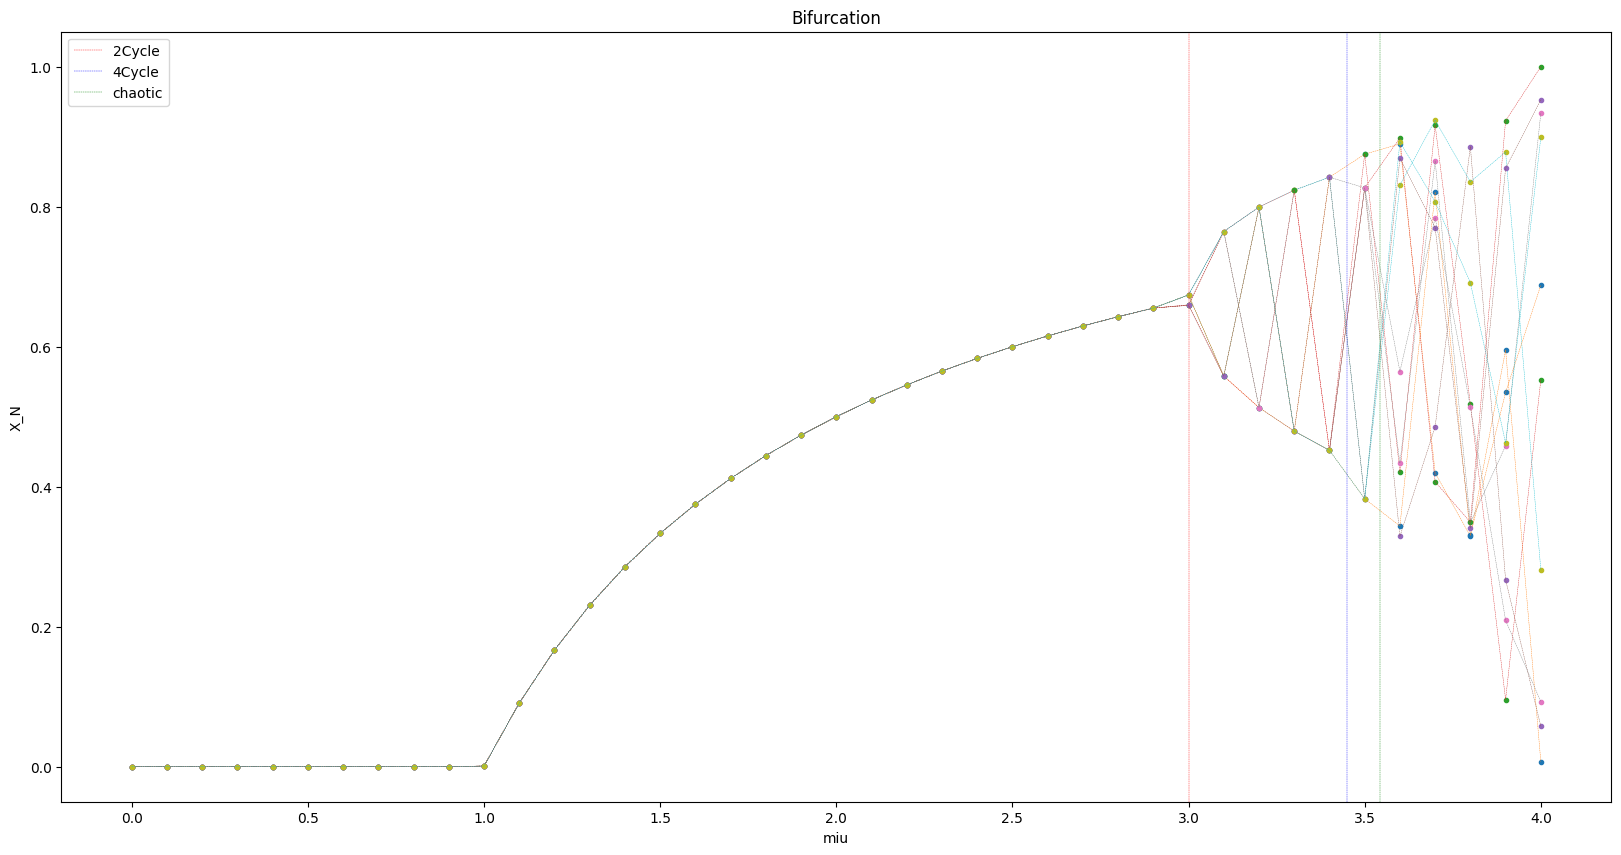

In [ ]:
xs,mius = logestic(N,M)

plt.figure(figsize=(20,10))

for i in range(M):
  plt.plot(mius,xs[i,:],'.')
  plt.plot(mius,xs[i,:],'--',linewidth=.3)

plt.title('Bifurcation')
plt.xlabel('miu')
plt.ylabel('X_N')
plt.axvline(3,color='r',linestyle='--', linewidth=.3,label='2Cycle')
plt.axvline(3.449,color='b',linestyle='--', linewidth=.3,label='4Cycle')
plt.axvline(3.544,color='g',linestyle='--', linewidth=.3,label='chaotic')
plt.legend()

# 4

سعی کزدم تلفیقی پایتون متمتیکا حل کنم ولی درست درنیومد. فایل متمیتیکا الصاق ایمیل است!

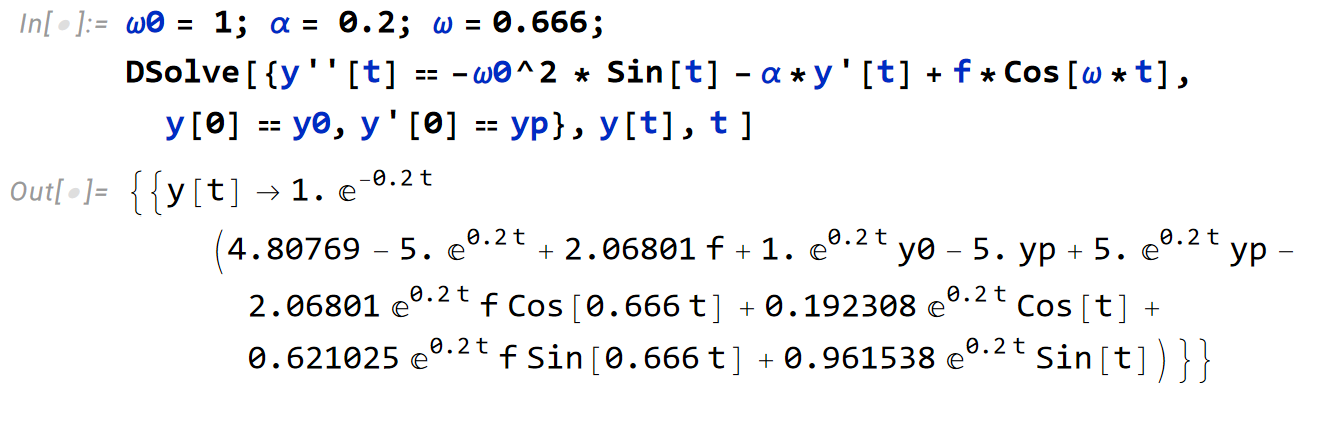

In [ ]:

def y(t, y0, yp,f):

  a = 1 + 0.1 * np.exp(-0.2 * t) * (
      4.80769 - 5 * np.exp(0.2 * t) + 2.06801 * f +
      0.1 * np.exp(0.2 * t) * y0 - 5 +
      0.1 * yp + 5.1 * np.exp(0.2 * t) * yp -
      2.06801 * np.exp(0.2 * t) * f * np.cos(0.666 * t) +
      0.192308 * np.exp(0.2 * t) * np.cos(t) +
      0.621025 * np.exp(0.2 * t) * f * np.sin(0.666 * t) +
      0.961538 * np.exp(0.2 * t) * np.sin(t)
  )

  return a


<function y at 0x78006109f2e0>
0.645563486198454


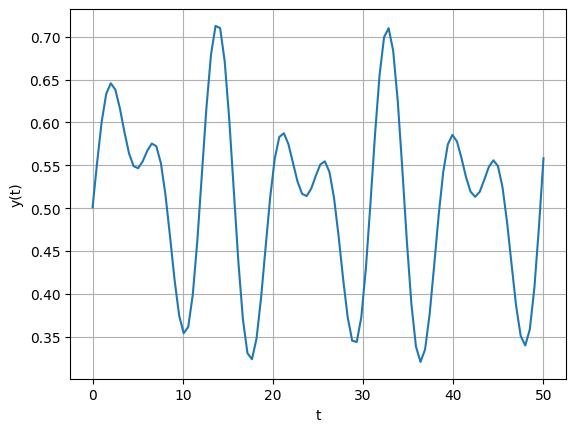

In [ ]:
f=0.52
t= 2.0
y0 = 0.1
yp = 0.0
ys = y(t, y0, yp,f)
print(y)

y_real = ys.real
print(y_real)


ts = np.linspace(0, 50, 100)
ys = [y(t,y0,yp,f).real for t in ts]

plt.plot(ts, ys)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

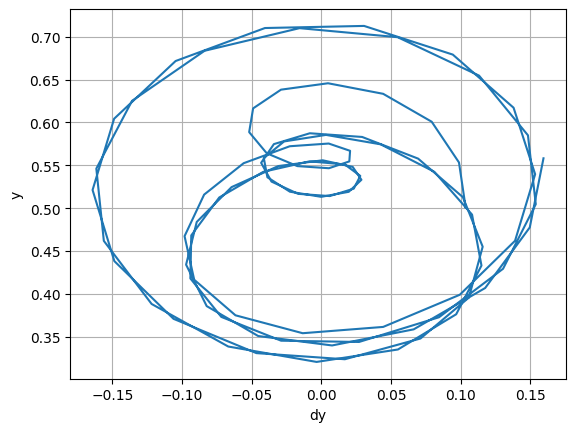

In [ ]:
dys= np.gradient(ys,ts)
plt.plot(dys,ys)
plt.xlabel('dy')
plt.ylabel('y')
plt.grid(True)
plt.show()

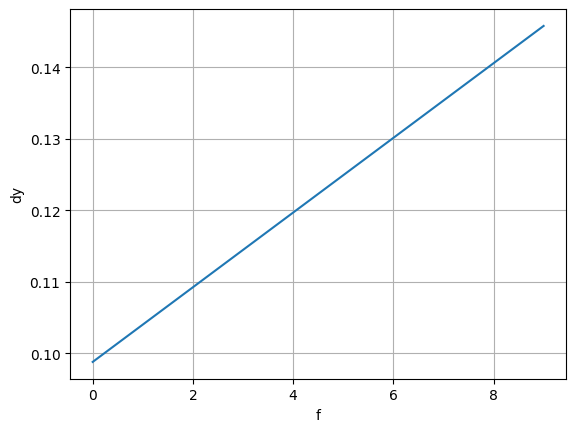

In [ ]:
dys=[]
t=np.linspace(0,2,20)

for f in range(10):
  ys=y(t,y0,yp,f).real
  dys.append(np.gradient(ys,t))

dys= np.array(dys)
plt.plot(range(10),dys[:,0])
plt.xlabel("f")
plt.ylabel("dy")
plt.grid(True)
plt.show()


In [ ]:
np.shape(dys)

(10, 20)

# 5

جان به لب شدم و رفتم کلا تو متمتیکا حل کردم. فایلش ضمیمس